These import packages are fimilar and are relevent to CNN and then ones are new are layers Conv2D and MaxPooling2D,These layers are the core structures of a CNN and will definitely be used when we create our model. We are also exposed to Dropout and Flatten as you might recall these layers types are essential for data manipulation inside the CNN. The Dropout layer randomly sets a fraction of the input values to zero which helps reduce overfitting in the network and the Flattened layer as you might recall simply flattens the shape of the feature maps output it from convolutional and pooling layers and returns it as a 1D flatten array, that way it can be input it into the fully connected layer that is in charge of classification based on the extracted features.

Data initialization, as of right now importing data into our code has been relatively simple. we either created our own data to begin with using numpy or we imported data points from sklearn, or we simply imported the minist dataset from keras itself. However for our traffic signed dataset we are going to access a repository on bitbucket. This repository contains the required datasets that we must clone and subsequently use in our project.


So we are going to copy the repository using then '!git clone https://bitbucket.org/jadslim/german-traffic-signs'
Google Lab. and it show us that we have a directory called german-traffic-signs which contains 4 files.
signnames.csv: which contains all traffic signs along with thier labeled names.
The rest of files are pickled files that conatin our respection training, testing, and validation datasets. what is the pickled file? In python to save something on disk it can be pickled that is it can be serialized before writing the file by serializing it. It converts all the object to character stream. Pickled files in python essentially contain serialized data that can be unpickled when desired. Since the characters stream we just talked about contains all the information necessary to reconstruct the serialized object and thus unpickling would be the inverse operation of pickling. So as to deserialize the python object and make use of it in our program. The character stream state is often more convenient tostore and transfer which makes pickling an important operation in python.

In [1]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

Cloning into 'german-traffic-signs'...
remote: Counting objects: 6, done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 6 (delta 0), reused 0 (delta 0)
Unpacking objects: 100% (6/6), done.


In [2]:
!ls german-traffic-signs

signnames.csv  test.p  train.p	valid.p


Since we imported our repository, let's move on towards loading and unpickling our data. we begin by importing pickle. and we are going to access each pickle file and unpickle them to make them usable.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers import Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
import pickle
import pandas as pd
import random

Using TensorFlow backend.


In [0]:
np.random.seed(0)

keyword 'with' is used whenever you wish to execute two operations as a pair and have a block of code in between and invoke a block of code in between. so in our case we will open a file manipulate it in what is convenient is 'with' will then automatically close the file for us.
The first operation will be to open the pickled file and instead the brackets we will specify the file that we want unpickle, and the 2nd argument for this open function is going to describe the way in this file is going to be used. like rdeading the file in binary format.
storing all of our data into the variable 'f'. and you can't really do much with the content of the file unless it is deserialize (unpickled), so we make use of the pickle module and call: pickle.load(), and we want to load the content of such that it is unpickled.
Now that we have successfully loaded our training data and in representation that we can actually use we can store this unpickle data inside of a variable called train_data.
train_data is actually a dictionary of data.
we will do this for our test and valid data.
Now that we have imported our data files we have one more step before we can effectively use it. now printing type of train data we can see that it is just a dictionary which contains key, value pairs. Two of these values we are actually interested in , one of them being the features and the other being the labels. The features key you will see that it corresponds to values of training images and pixel representation whereas the labels values coresponds to an array of labels which pretty much label each training image as belongingto some class. It helps the NN learn a function that property classifies the input data. Then we store these array into the respective X_train and y_train arrays. we do the same for valid and test train arrays.

Now we successfully imported and split our traffic sign data as training, testing and validation data we can move forward and analyze the data we have imported.

In [5]:
with open('german-traffic-signs/train.p', 'rb') as f:
  train_data = pickle.load(f)
#
with open('german-traffic-signs/test.p', 'rb') as f:
  test_data = pickle.load(f)
#
with open('german-traffic-signs/valid.p', 'rb') as f:
  val_data = pickle.load(f)

print(train_data)
X_train, y_train = train_data['features'], train_data['labels']
X_test, y_test = test_data['features'], test_data['labels']
X_val, y_val = val_data['features'], val_data['labels']

{'coords': array([[  6,   5,  21,  20],
       [  6,   6,  22,  22],
       [  5,   6,  22,  23],
       ...,
       [ 17,  15, 178, 155],
       [ 17,  15, 183, 160],
       [ 20,  18, 211, 184]], dtype=uint8), 'labels': array([41, 41, 41, ..., 25, 25, 25], dtype=uint8), 'features': array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ...,

        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]],

        [[ 28

by printing thier shape, gives us a good idea of how our data is structured. we see that theshape of our training data set is the following, as you can see we only have 34799 images in our training sets where each image has dimensions of 32X32 pixels and also each one having a depth of 3. The reason for this is that while our images were gray scaled and therefore only had a depth of 1. our traffic sign images are in RGB format and therefore have an addintional depth for each of the 3 color channels (red, green, blue) . similarly for test and valid .
So we effectively imported our data and we have checked the format of our dataset to ensure that it is consistent with our expectation.

In [6]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


Now that was done previously with the minist dataset whenever importing a complex datasetit is good practice to verify that your dataset was imported correctly whenever your program is run. so once again we use assert , we must first assert that the number of images is equal to the number of labels. we are also make sure the size of our images 32X32 with a depth of 3

In [0]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels"
assert(X_val.shape[0] == y_val.shape[0]), "The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels"

assert(X_train.shape[1:] == (32, 32, 3)), "The dimesions of the images are not 32, 32, 3"
assert(X_val.shape[1:] == (32, 32, 3)), "The dimesions of the images are not 32, 32, 3"
assert(X_test.shape[1:] == (32, 32, 3)), "The dimesions of the images are not 32, 32, 3"

Now that we have ensured that our imported data is accurate, let's get an idea of what kind of data we are dealing with. That just to say let's plot and analyze our data so we can visualize and see how many traffic sign images are present for me to grasp. the file 'signnames.csv' contains all of the traffic sign classes. So to manipulate and analyze data inside of a file we will make use of a python data analyzer liberary known as 'pandas'. In any sciense data project oftentimes will work with csv comma separated value files. we use pandas for this, using pd.read_csv()

In [8]:
data = pd.read_csv('german-traffic-signs/signnames.csv')
print(data)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vechiles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

The reason for this is what we want to do is actually end up creating a grid like we did for mimnist dataset.
Code below, we are dealing with 43 classes, since we are dealing with much more in classes we need to make sure our grid is much lager vertically 50.
Every row that was being activated it through corresponded to a class of images, well instead of iterating over some numeric range we are going to iterate over our data and we will declare data.iterrows, what this actually allows us to do is iterate over our entire data frame rows as index and series pairs (index, Series). So as we are iterating through these data each index corresponds to the current index of the class being iterated through. And all of these will be stored in variable j, and the series is a 1D a labeled array which holds the relevant data for each row like the sign name, it respective class and so on. So what we will do is iterate over the series through a placeholder variable, we are just going to call row.
We are grabbing the correct image for every column and row j that is iterated through the grid.
This grid shows a simple traffic sign training images that we are going to use to train our CNN to recognize and learn from. And all the more validation that we have successfully imported our training data. and once again the wide variation among the samples of training images highlights just how difficult of a task it can be to classify these traffic sign images. 


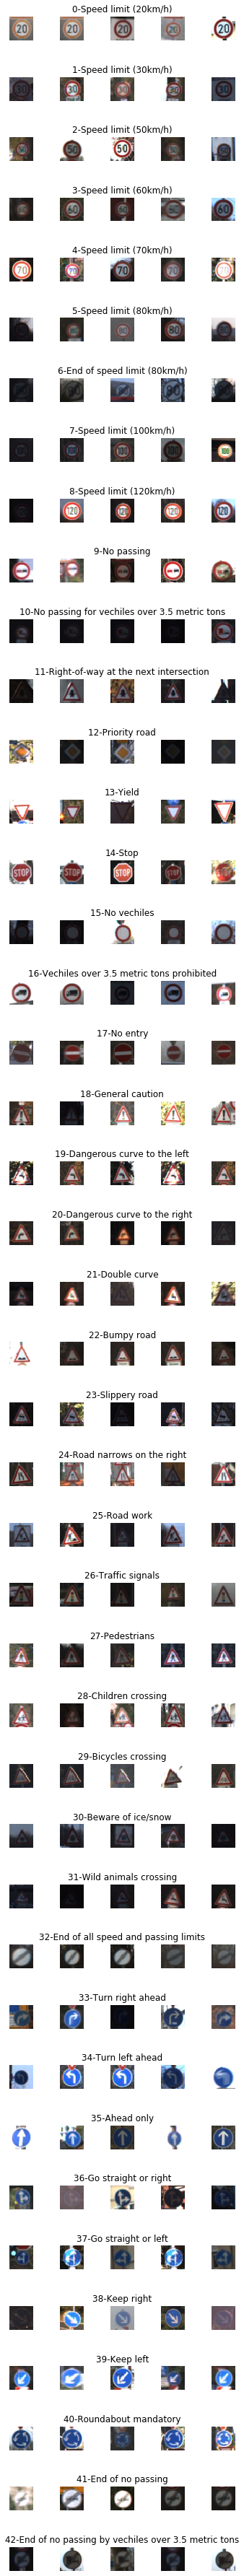

In [9]:
num_of_samples = []
cols = 5
num_classes = 43

fig, axs = plt.subplots(nrows = num_classes, ncols = cols, figsize = (5, 50))
fig.tight_layout()

for i in range(cols):
  for j, row in data.iterrows():
    x_selected = X_train[y_train == j]
    axs[j][i].imshow(x_selected[random.randint(0, (len(x_selected) - 1)), :, :], cmap = plt.get_cmap('gray'))
    axs[j][i].axis("off")

    if i == 2:
      axs[j][i].set_title(str(j) + "-" + row["SignName"])
      num_of_samples.append(len(x_selected))



And now to summarize and visualize how many training images are present for each class:

As you can see our traffic signed it is much less uniform than the endless data set that were used before, some classes have a larger number of training images belonging to them, while some classes have very little training images this means that some classes will have less data to train with and might return less accurate results.

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


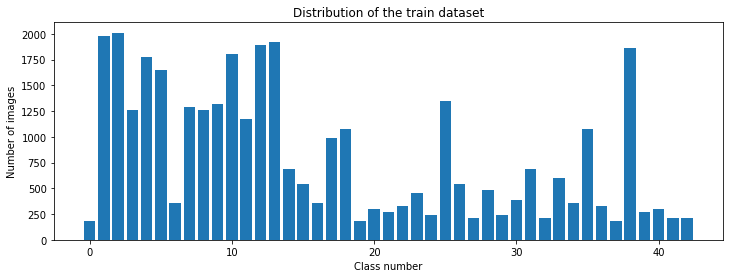

In [10]:
print(num_of_samples)
plt.figure(figsize = (12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()

So lets move forward and tackle it before we can design and train our model. Recall that we need to preprocess our data accordingly. While our previous missed images were gray maps, meaning they only have depth of one and where relatively simple in the sense that they were just a white hand written letters on a background. Our traffic sign that is set is a little more complex, the trafic sign images RGB channels meaning they have a depth of 3 and they contain various signs with a variety of backgrounds and lighting conditions, they are not all black as they were just essentially each one of them contains a unique extra features that make it more difficult to classify them, therefore we can preprocess these images to make it easier for our network to classify them.

So let us begin by plotting a random image in a dataset and following through with the entire preprocessing process first using plt.imshow(arbitrary image) and for aesthetic purposeslet's also turn off the axises from our plot using plt.aixs("off"), and print image shape, to keep track of how it changes through pre-processing so running this shows. Shape of image which is currently 32X32 pixels and depth of 3 and show us we have a goust trail of right sign which have label of 36.

(32, 32, 3)
36


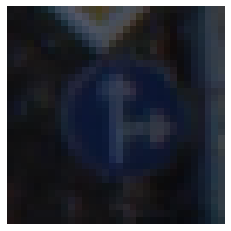

In [11]:
import cv2

plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])

Now let's move on to our first pre-processing technique, The first being to convert our image to grayscale will define a function a function grayscale() which reeives an image.
It is important for 2 main reasons the first being that one distinguishing between traffic signs, color is not a very sinificant feature to look for, The lighting in our image varies and many of the traffic signs of similar colors reinforcing that it is not a very relevant piece of information. the features of the traffice signs that really matter are the edges the curves the shape inside of it. That is what the network should focus on.
Now this brings us to the next reason which is the fact that when we convert an image RGB to grayscale we reduce the depth of our image from 3 to 1. This means that our road network now requires fewer parameters as our input data will only have a depth of one channel. In the long run this means that our work will be much more efficient and will require less computing power to classify our data. 

(32, 32)


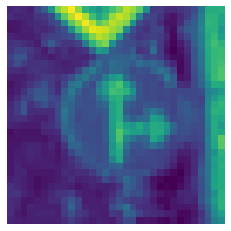

In [12]:
def grayscale(img):
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)

Let's move on to the pre-processing technique, This technique is referred to as histogram equalization and histogram equalization aims to standardize the lighting and all our images. while some of our images very bright and others very dim after histogram equalization these images will have similar lighting effect. Histogram equalization takes our histogram and spreads it at the ends to get a histogram that covers a higher range of brightness values and helps to normalize the lighting and all of our images. The process also results in higher contrast with our image which can help with feature extraction. This enhances the contrast in the image that pinning grayscale intensities are now better distributed across the image at the same time the emphasizing any pixel intensities that occur at high frequencies and it does so theoretically by flattening the resultant image histogram as it resigns gray values in the image  

(32, 32)


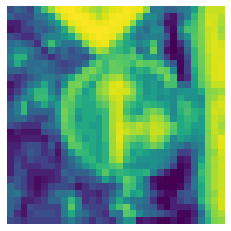

In [13]:
def equalize(img):
  img = cv2.equalizeHist(img) # this will take image that is already grayscale processed
  return img

img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)

Notice the increased contrast and the more defined features making it easier for our NN to learn and extract these features. A clear demonstration of the benefits behind histogram equalization.

So We need to apply these 2 processes to all our images. We also need to define another pre-processing technique that we have used in the past and that is normalization, this why we divide all the pixel intensities of our images by 255 as we have done in the past. This causes all the pixel values in our image to be normalized between 0 and 1. This is done simply by taking our image and dividing it by 255.

In [0]:
def preprocessing(img):
  img = grayscale(img)
  img = equalize(img)
  img = img / 255
  return img 

X_train = np.array(list(map(preprocessing, X_train)))
X_val = np.array(list(map(preprocessing, X_val)))
X_test = np.array(list(map(preprocessing, X_test)))

(34799, 32, 32)


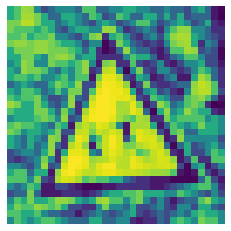

In [15]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis("off")
print(X_train.shape)

So the next step in preparing our data for use any CNN is to add depth to our data. At the moment each image is 2D and there is no depth to them, as as you recall the way CNN is applying a filter to the channelsof the image that is being viewed in the case of grayscale images, there is one channel present therefore our data must refelect the presence of the steps, and so by adding this depth our data will be in the desired shape to be used as an input for the convolutional layer. 


In [16]:
X_train = X_train.reshape(34799, 32, 32, 1)
X_test = X_test.reshape(12630, 32, 32, 1)
X_val = X_val.reshape(4410, 32, 32, 1)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


The final step in preparing our data for use is to use one hot and cold our data labels. This process is familiar from the last section of the course where we classify it multiclass, we define a new y_train variable that stores the one hot and cold values returned from to_categorical. As you may recall to_categorical will take in 2 args the first being our labeled data that need to be one hot coded by train and the 2nd one the total amount of classes within our dataset 43, and we do the same for y_test, y_val  

In [0]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)
y_val = to_categorical(y_val, 43)

Now we have successfully processed our data and now ready to use our data to train and validate our CNN.

Here now we must go through the process of designing our NN and the previous section we classified Minist dataset using Lenet model CNN. We are using the same network and assessing performance.
We will begin coding this architecture by defining our Lenet_model function.
and we will define our neural model by once again setting it equal to sequential and now we can start adding layers to our neural network as we have done previously. we start by first adding the Convolutional layer with model.add(conv2D) as we are creating a CNN and we know these convolutional layers consist of filters that recognize various features within the image. So when the first conv2D we will specify how many filters our layer is going to have. We will take a similar approach to the last tutorial and go with 30 filters (increase this number of filters demand more computing power), and will put down a 5X5 tuple to define the size of our filters, we must also specify the general shape of each input image being fed into the neural network that is input_shape = (32, 32, 1) meaning each image being fed will be 32 X 32 image with a single channelof pixel intensity values and finally the last argument for this convolutional layer is the actiavtion function which we will set to relu function - the output of this layer is a 28X28X30 which make sense we are 32X32 image is now being reduced to 28X28 image with a depth of 30 since we are making use of 30 independent filters. Each filter adds an extra depth to the convoluted image hence the depth of 30 corresponding to 30 feature maps extracted by each kernel. And the reason why each feature map is scaled down to be 28X28 makes sense convolving 5X5 kernel with a stride of 1 we lose 2 pixel layer thickness that all borders of the image which makes sense as to why it results to a 28X28 foreach feature map. And really there is no need to preserve the borders since looking at the traffic signs they seem to be centralized. And so the borders don't really contain any significant features that are necessary for the neural network to learn and justlike before in the first convolutional layer the network will have a total of 780 parameters that is must learn to adjust 750 since each kernel has 25 adjustable parameters (5*5) and there are 30 kernels => 5*5*30+30 will end up with 780 adjustable parameters as demonstrated in minst dataset.

And once again we must add a pooling layer as per the load that model architecture, so we use model.add() to add a max pooling 2D layer. The first arg being thpooling element and we use a tupe to define this pooling size as our traffic sign. images are very similar in dimensionality to the iminst images we dealt with earlier. So poolinf_size = (2, 2)
As you may recall pooling will scale down all the feature maps from the convolutional layer into a small abstracted it generalized representation which ultimately helps to avoid overfitting and reduces the amount of parameters that are being adjusted. And as we have already seen this 2x2, in particular will scale down the image by 1/2 of its original size, it will be a 14x14 rather than a 28x28. Output of max pooling will still contain a depth of 30, since pooling does not affect the depth and this depth contains all the necessary feature maps extracted from the original image each of the filters and is very valuable.

Now we add another convolutional layer 'Conv2D', here the number of filters since we are dealing with  a more dense input for this layer, since a very dense put coming out of the MaxPoolin2D is going into the new convolutional layer we are going to use fewer filters for the purpose of minimizing the required computational power, we are going to use 15 filters on this layer and as our input images smaller this time we are going to use smaller filters to extract each feature with our filter sizes going to be 3x3. And since this input being received by this convolutional layer has a depth of 30 each filter must be applied to each depth which results in 15 filters times 30 depths that are being processed times 9 parameters per filter becomes 4050 parameters. and we also add a bias parameter for each of the filters that we are using, which results in total of 4065 parameters.
Last arg we use activation function which will be set to 'relu'. So the output of this layer would be 12x12 with a new depth of 15 as we made use of 15 kernels and we are now going to feed this input into our second pooling layer, so we use MaxPooling2D and using the same pooling size as above (pool_size=(2,2)). to cut the dimensions of our image and helf the resulting output of this pooling process is a 6x6 image with a depth of 15, however the pooling has kept the most relevant parts of the features that were extracted, so that is it for the convolutional and pooling layers. Recall the flatten functin the we imported earlier we are going to put it to use and the next portion of our network which will help us flatten our data in oreder to format it properly so that it can be fed into the fully connected layer. adding Flatten layer, as mentioned earlier this simply flattens our dataset. This is very important to do as we are now going to take our convoluted data and feed it into the fully connected layer as a 1D array, So originally it is going to go into the flattend layer and a 6x6x15. although it will reshape it into a 1D array of shape 540 (6x6x15). So 540 nodes will be fed into our multi-layered perceptron and our data is now ready to be fed into the fully connected layer, so lets declare it with Dense layer. And the familiar dense layer for every node in the subsequent layer is connected to evey node in the preceeding layer. We first define the amount of nodes that we want to add in this hidden layer, we will add 500 nodes to this layer (this number arbitrory and can be adjusted as  desired - keeping in mind that a lower number will typically provide minimally less accuracy whereas a higher number requires more computing power, Also keeping in mind 500 nodes increase the network size , increasing the number of parameters which means the network will fit the data arbitrarily well making it much more prone to overfitting), We will define the activation function is equal to 'relu'.
Now add to our model a Dropout layer. The dropout layer takes a arg for fractioned rate which refers to the amount of input nodes that dropout layer drops during each update with zero ferring to a no to no drops and one  whichreferred to when all the input nodes are dropped. We will use 0.5 since that is the recommanded rate so that half the input nodes will be dropped at each update.

Finally we are ready to define the output layer of our network, we use similarly a fully connected layer 'Dense'. Since this is our output layer we will define the number of nodes to be equal to the number of classes and we define the activation function to be 'softmax' as our output layer must effectively classify between 43 classes

In [0]:
def lenet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Complie the model
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [19]:
model = lenet_model()
print(model.summary())






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               270500   

Allright we are finally ready to train our model and evaluated its performance on the subsequent cell we are going to use model.fit() to define our training parameters. First we import our training dataset and our X_training data labels and y_train, then we define the amount of epochs  which we will set equal to 10 that is as many epochs as we want to run and next we will need to define our validation_data for our network to use, we can simply set this to X_val along with y_val which contains the respective labels, we will use a batch_size equal to 400 which is reasonable considering that our dataset as a total of roughly 35000 images and finally we set verbose to 1 and shuffle to 1. 
So now we are ready to train our model.

In [20]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 34799 samples, validate on 4410 samples
Epoch 1/10





34799/34799 [==============================] - 29s 827us/step - loss: 1.9567 - acc: 0.4479 - val_loss: 0.7007 - val_acc: 0.8014
Epoch 2/10
34799/34799 [==============================] - 28s 799us/step - loss: 0.4860 - acc: 0.8433 - val_loss: 0.4184 - val_acc: 0.8735
Epoch 3/10
34799/34799 [==============================] - 29s 832us/step - loss: 0.2935 - acc: 0.9064 - val_loss: 0.4575 - val_acc: 0.8721
Epoch 4/10
34799/34799 [==============================] - 28s 802us/step - loss: 0.2194 - acc: 0.9297 - val_loss: 0.3886 - val_acc: 0.9023
Epoch 5/10
34799/34799 [==============================] - 28s 804us/step - loss: 0.1643 - acc: 0.9493 - val_loss: 0.3336 - val_acc: 0.9218
Epoch 6/10
34799/34799 [==============================] - 28s 806us/step - loss: 0.1422 - acc: 0.9532 - val_loss: 0.3212 - val_acc: 0.9122
Epoch 7/10
3479

As you can see above, we are getting a relatively high accuracy as the number of the epochs progress, the training accuracy seems to be converging to approximately 96% , the validation accuracy initially started higher than the training accuracy but started trailing at about 4th epoch or the 3rd epoch, it seems and it ended up being relatively low at a final value close to 93%.

So lets plot our data to get a visual representation of it and analyze how the network performed.

Text(0.5, 0, 'epoch')

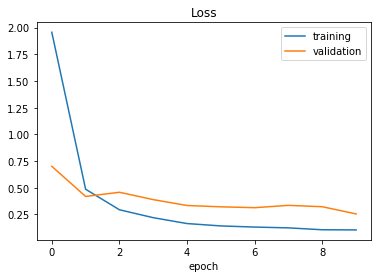

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

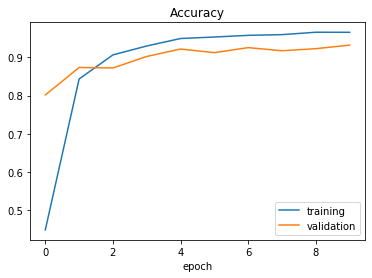

In [22]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

And finally we can run our model on our test data to evaluate its performance.

In [23]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

Test Score:  0.38969829229612907
Test Accuracy:  0.9189231986954206


Now we have a good quantitve understanding of our network's performanace and it is not very good evaluating we see that the loss is even higher at a minimum value of about 0.09, and the validation loss is even higher at about 0.25, it is perty high and moving on to accuracy we see that we get a training accuracy of about 0.96 while our validation accuracy seems to lag behind at a maximum value of 0.93, these value imply that our network is not performing effectively in terms of accurately predicting images from our dataset, and what is more our network seems to have eoverfit in our data as well. This can be seen visibly in our graphsdue the fact that our validation accuracy is trailing behind our training accuracy and it is pertty much doing that from the get go. Evaluating our model also shows that right network is not at peak performance. It has a relatively low accuracy rating, so obviously we must find to our model to improve its performance. And as mentioned earlier this traffic sign at a site if going to be more difficult to classify due fewer training images more complex data and a much higher number of classes in which these traffic signs are being classified and also noting the non-uniform distribution of images that we have. And so for this reason we are very same Lenet model that performed very well with the imnest dataset, is now having issues classifying our traffic signs dataset correctly.

So how we can fine tune our network to give us better performance? We have 2 main issues that we are dealing with:
  - Firstly our accuracy is not as high as we would like
  - secondly our network seems to be overfitting our training data

The first issue can be yackled using a variety of modifications to our Lenet model code, now keep in mind that these modifications are case dependent, in fine tuning is often a very specific process that is unique for each deep learning task. However fine tuning your model is important and can often times improve your models performance signficiently. Therefore always try and modify your model to see just how these modifications improve the effectiveness of your model. 
when it comes to improve accuracy I have had good experience with the following modifications that I will show you soon.

Firstly although the Adam optimizer computes individual adaptive learning rates it is important to specify a fitting initial learning rate for optimal performance. a learning rate that is too high can often lead to lower accuracy. However a lower learning rate can help a NN learn more effecitively when a more complex dataset is involved.
Our current learning rate is 0.01, However lets decrease this down to a factor of 10 by a factor of 10, I should say to 0.001. Then re run the code, this will change our model and to redefine our model summary, as we simply change the learning rates, the model summary should not be affected as we can see and so moving towards training our modified model to evaluate it performance.

Alright, we van now see our accuracy converging closer to 97%. We are seeing slow increate in accuracy as the training process continues, so after our 10 epochs our re-validation accuracy is 0.92  whereas our training accuracy is 0.97. Therefore this modification improved our training accuracy. However our validation accuracy suffered quite a bit.
The improvement in accuracy was also quite modest and still does not meet our standards as to how high it should be. However it was also useful to see just how small modification to your model can indeed affect your accuracy. By evealuting the plots we can see that our models is still overfitting as the validation accuracy is below the training accuracy in evaluating our model shows us that the test accuracy also increased slightly to 0.91. 


In [0]:
def lenet_model_optimized_part1():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Complie the model
  model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [25]:
model = lenet_model_optimized_part1()
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 30)        780       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 30)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 15)        4065      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 540)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               270500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)              

In [26]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 29s 846us/step - loss: 2.5695 - acc: 0.3214 - val_loss: 1.3100 - val_acc: 0.6132
Epoch 2/10
34799/34799 [==============================] - 29s 833us/step - loss: 0.9177 - acc: 0.7197 - val_loss: 0.6680 - val_acc: 0.8025
Epoch 3/10
34799/34799 [==============================] - 29s 834us/step - loss: 0.5240 - acc: 0.8411 - val_loss: 0.4792 - val_acc: 0.8463
Epoch 4/10
34799/34799 [==============================] - 30s 857us/step - loss: 0.3684 - acc: 0.8884 - val_loss: 0.3860 - val_acc: 0.8796
Epoch 5/10
34799/34799 [==============================] - 29s 834us/step - loss: 0.2812 - acc: 0.9163 - val_loss: 0.3289 - val_acc: 0.8948
Epoch 6/10
34799/34799 [==============================] - 29s 834us/step - loss: 0.2325 - acc: 0.9315 - val_loss: 0.3230 - val_acc: 0.8984
Epoch 7/10
34799/34799 [==============================] - 29s 829us/step - loss: 0.1849 - acc: 0.9461 - val_loss: 0.3

Text(0.5, 0, 'epoch')

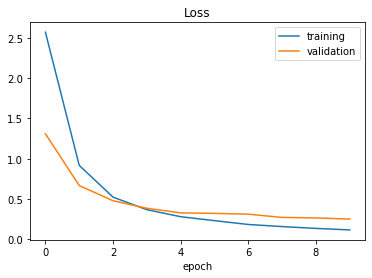

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

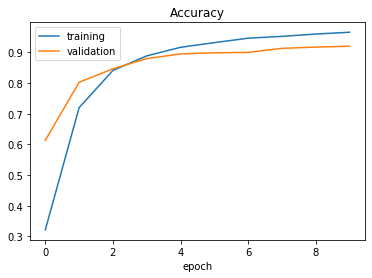

In [28]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [29]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

Test Score:  0.3637317952473581
Test Accuracy:  0.9060965953983208


Let's re-visit our model to see what other modifications we can make towards improving our model. The second technique that I will show you for improvingforpotentially improvingaccuracy is increasing the number of filters inside your convolutional layer, increasing the number of filters in our convolutional layers canhelp our network extract more features from the images and can result in improved accuracy.
We can double the amount of filters in each layer, so in the first layer let's define 60 filters, ad in second layer let's define 30 filters and now while this requires more parameters and therfore more computing power it is a necessary modifv=cation for improving our networks performance. 

After run the code below, and summary; as you can see the convolutional layers now contain more paramters, we now have 1560 paramters and our first convolutional layer in about 16230 in second layer and the number of parameters in our first dense layer has also increased due to our input image, now having a much larger depth which results in 1080 input know what's being fed into the fully connected layer thus explaining the increase in the number of adjustable parameters.
after running all the cells below, the accuracy seems to be converging around the value of 98%, so after our tenth epoch we can see our training accuracy to be 0.9809 and in our validation accuracy is 0.9347. Therefore this modification improved our training accuracy as well as our validation accouracy. The improvement in accuracy here with small however the combined effect of our 2 initial modifications has been very significant.
It is important to realize often times that each small modification has a small impact on improving our accuracy. However when all of these small modifications are used alongside each other the effects can be quite significant. Evealuating plot's we can see that our model is still overfitting as the validation accuracy is below the training accuracy and evaluating this model of shows that the test accuracy also increased slightly to 0.92 let's once again re-visit our model to see what other modifications we could make towards improving our model accuracy.

In [0]:
def lenet_model_optimized_part2():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Complie the model
  model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [31]:
model = lenet_model_optimized_part2()
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 60)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 30)        16230     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 30)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1080)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 500)               540500    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)              

In [32]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 50s 1ms/step - loss: 2.3635 - acc: 0.3682 - val_loss: 1.0049 - val_acc: 0.7170
Epoch 2/10
34799/34799 [==============================] - 50s 1ms/step - loss: 0.7130 - acc: 0.7828 - val_loss: 0.5037 - val_acc: 0.8422
Epoch 3/10
34799/34799 [==============================] - 51s 1ms/step - loss: 0.3746 - acc: 0.8879 - val_loss: 0.3934 - val_acc: 0.8760
Epoch 4/10
34799/34799 [==============================] - 50s 1ms/step - loss: 0.2515 - acc: 0.9245 - val_loss: 0.3263 - val_acc: 0.9025
Epoch 5/10
34799/34799 [==============================] - 51s 1ms/step - loss: 0.1828 - acc: 0.9462 - val_loss: 0.2425 - val_acc: 0.9249
Epoch 6/10
34799/34799 [==============================] - 50s 1ms/step - loss: 0.1401 - acc: 0.9584 - val_loss: 0.2199 - val_acc: 0.9288
Epoch 7/10
34799/34799 [==============================] - 51s 1ms/step - loss: 0.1136 - acc: 0.9661 - val_loss: 0.2254 - val_acc:

Text(0.5, 0, 'epoch')

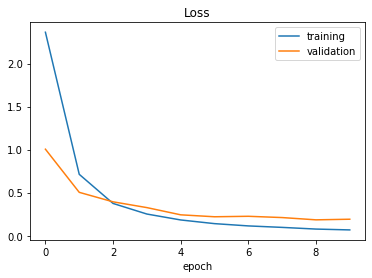

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

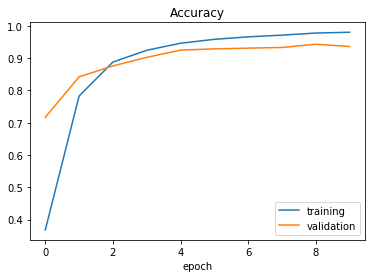

In [34]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [35]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

Test Score:  0.3127176024332371
Test Accuracy:  0.9233570863213316


Another modification that is effective is simply adding extra convolutional layers. This can help our network extract features more effectively and can also lead to improved accuracy, So let's simply add 2 more layers to our NN.
After the first convolutional layer we will add our 2nd Conv2D, we will use the same amount the filters the same size of filters and the same activation function as the 1st one, although we don't need to specify an input_shape. Also after the Conv2D with 30 filter, we will add another Conv2D with once again 30 filters 3x3 kernels and the same activation function which puts aside a total of 4 convolutional layers.So lets run this model with the summary, As you can see our convolutional layers comes with our own parameters which means that more computing power is required when these layers are added, however a very interesting point to note is that while these additional layers introduced thier own parameters the total number of parameters in our model decreased our previous model had a total of about 578000 parameters with this model we only have a total of 370000 parameters. The reason for this is the fact that with each convolutional layer the dimensions of our image decrease. This means that by that time our image of data reaches over fully connected layers it has much smaller dimensions. This result in a few work parameters within the fully connected layer which results in less overall parameterswithin our model. Therefore with this new modification our model will require less computing power and will potentially imporve our accuracy.
After fit our model, we are seeing a slow increase in accuracy as the training process continues. The accuracy seems to be converging around a value of almost 99%, so after 10th epoch we can see that our training accourcy 0.9883 and our validation accuracy 0.9635. Therefore this modification improved our training accuracy as well as validation accuracy. 
The improvement in accuracy was quite significant, and we have achieved a relatively high level of accouracy.
Evaluating our model shows us that the test accuracy also increased slightly to 0.95, our renew modified model has proven to outperform our initial basically Lenet model. However the issue of overfitting is still present evealuting the plots we can see that our model is still overfitting as the validation accuracy is below the training accurcay.
By revisiting our model to see what other modifications we can make towards dealing with this overfitting issue. So we improved the accuracy to an acceptable standard. How do we tackle our issue of overfitting as discussed in the prevoius section Dropout layers are an effective way of preventing overfitting, we already have a dropout layer inside of our model, however as overfitting is present we can attempt to prevent it by adding another dropout layer. using more than one dropout layer is common and can be a very effective technique. So what we will do actually is another dropout layer right after our pooling process.

As we simply added a drop out layer to our network, our sammary remains relatively the same and the total number of parameters stays the same, So finally we can train our new model to verify that we have dealt with overfitting and after running the model, we are seeing a slow increase in accuracy as the training process continues. the accuracy seems to be converging around a value of ~97%, So after our 10th epoch we can see that it is at an accuracy of 0.9663 and our validation accuracy is 0.9769.
Therefore while our validation accuracy was improved by this modification we are training accuracy's suffered. However bioth our accuracy's are now relatively high which is good to see, and so by plotting our loss and validation loss plots's we can see that we have solved our issue of overfitting our validation loss is always lower than thetraining loss and we can see the same thing in our accuracy, our validation accuracy is also higher than our training accuracy which implies that our model is better equipped to generalize itself towards new data. This can also be seen by evaluating our model and the model test should come out with a pretty high value ~0.96. This shows us tht our model is able to handle new data with a higher accuracy.


Summarize, unlike our minset dataset, our traffic sign it was more difficult to classify. our network deal with less data, more complex data points within our dataset, larger dimensional images and the fact that all images were RGB and so for tis reason were basically Lenet model which performed very well on minset was unable to effectively classify our traffic sign it is set. This was meant to modify our model to improve its learning capabilities. We decrease learning rate allowing our model to learn more slowly but more effectively, we increased the number of filters in our convolutional layers as well as the number of convolutional layers to allow for more effective feature extraction and finally we added a dropout layer to prevent overfitting our data, with all these modifications we saw significant improvement in accuracy and prevented overfitting

In [0]:
def modified_model():
  model = Sequential()
  model.add(Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu'))
  model.add(Conv2D(60, (5, 5),  activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  #
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(Conv2D(30, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.5))
  #
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  # Complie the model
  model.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [37]:
model = modified_model()
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 60)        1560      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 60)        90060     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 60)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 30)        16230     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 8, 8, 30)          8130      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 30)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 4, 4, 30)         

In [38]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=400, verbose=1, shuffle=1)

Train on 34799 samples, validate on 4410 samples
Epoch 1/10
34799/34799 [==============================] - 378s 11ms/step - loss: 2.4337 - acc: 0.3454 - val_loss: 0.6913 - val_acc: 0.8254
Epoch 2/10
34799/34799 [==============================] - 378s 11ms/step - loss: 0.6855 - acc: 0.7869 - val_loss: 0.2615 - val_acc: 0.9222
Epoch 3/10
34799/34799 [==============================] - 377s 11ms/step - loss: 0.3927 - acc: 0.8764 - val_loss: 0.1666 - val_acc: 0.9526
Epoch 4/10
34799/34799 [==============================] - 374s 11ms/step - loss: 0.2704 - acc: 0.9136 - val_loss: 0.1213 - val_acc: 0.9621
Epoch 5/10
34799/34799 [==============================] - 376s 11ms/step - loss: 0.2175 - acc: 0.9316 - val_loss: 0.1077 - val_acc: 0.9703
Epoch 6/10
34799/34799 [==============================] - 375s 11ms/step - loss: 0.1751 - acc: 0.9454 - val_loss: 0.1118 - val_acc: 0.9703
Epoch 7/10
34799/34799 [==============================] - 376s 11ms/step - loss: 0.1498 - acc: 0.9532 - val_loss: 0.0

Text(0.5, 0, 'epoch')

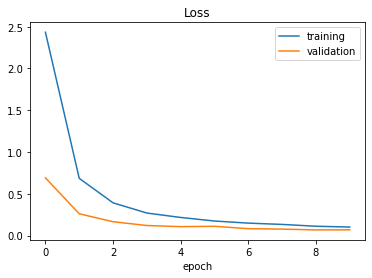

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

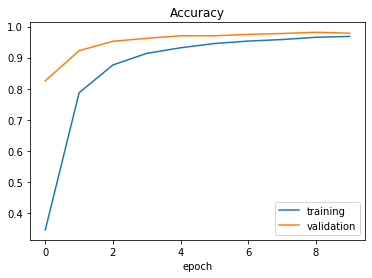

In [40]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [41]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])

Test Score:  0.1381132934056665
Test Accuracy:  0.9595407759492018


Now we can put our network to real test by evaluating it on a real images off the internet.